In [1]:
import pandas as pd
import os
import seaborn as sns

**Penggabungan laporan per bulan. Masih ada kesalahan input dari kota Lamandau**

In [2]:
#path = "./Sheika_2019_2020"
#files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

#all_months_data = pd.DataFrame()

#for file in files:
#    current_data = pd.read_excel(path+"/"+file)
#    all_months_data = pd.concat([all_months_data, current_data])
    
#all_months_data.to_excel("all_data_sheika.xlsx", index=False)

In [3]:
# Pakai file all_data_sheika_edit -> Error di kota Lamandau sudah solved

all_data = pd.read_excel("all_data_sheika_edit.xlsx")
# all_data = pd.read_csv("all_data_sheika.csv")
all_data[['JML', 'NOMINAL', 'ORDERAN']].head()

,JML,NOMINAL,ORDERAN
0,1.0,208003,Fazilla Purple Kids size.5 (set)
1,6.0,1725003,- ELENORA CREAM L(5) do\n- Elenora kids cream ...
2,2.0,354003,- Keya Taro XL do\n- Khimar Tisha Lavender
3,2.0,464003,- Alesha peach M do\n- Khimar elenora peach (p...
4,1.0,207003,Tisha Putih M do


In [4]:
# Find NAN
#nan_df = all_data[all_data['NOMINAL'].isna()]
#nan_df.head(50)

# Menghilangkan nilai null di kolom 'NOMINAL'
all_data = all_data[pd.notnull(all_data['NOMINAL'])]
all_data.head()

,#REF!,ALAMAT,BANK,CS,DISKON,EKSPEDISI,JML,KET,NAMA,NAMA/KODE CS,NO HP,NOMINAL,ONGKIR,ORDERAN,TGL ORDER,TGL TRF,Unnamed: 16,VALIDASI,no
0,NaN,Jl. Tempurejo gang V/7 Rt/Rw: 002/003 kec : Mu...,BCA,CS YENI (082321458214),NaN,JNE REG,1.0,NaN,Ulick,NaN,085737824872,208003,19000,Fazilla Purple Kids size.5 (set),30/03/19,201904.0,NaN,WAWAT,(01)1
1,NaN,JL.PEMDA RT.9 MALINAU HULU Kecamatan :MALINAU ...,BCA,CS YENI (082321458214),25000,JNE REG,6.0,NaN,RATNA PRATININGRUM,NaN,082254494711,1725003,146000,- ELENORA CREAM L(5) do\n- Elenora kids cream ...,30/03/19,201904.0,NaN,WAWAT,(01)2
2,NaN,Dsn. Ciagem RT 13/03 Dsa. Jayamakmur Kecamatan...,BCA,CS YENI (082321458214),NaN,JNE REG,2.0,NaN,Nurlaelah,NaN,085811795122,354003,16000,- Keya Taro XL do\n- Khimar Tisha Lavender,30/03/19,201904.0,NaN,WAWAT,(01)3
3,NaN,Jalan segara madu/pasar ikan kedonganan Depan ...,BRI,CS YENI (082321458214),NaN,JNE REG,2.0,NaN,A junaidi,NaN,083119548203,464003,24000,- Alesha peach M do\n- Khimar elenora peach (p...,30/03/19,201904.0,NaN,WAWAT,(01)4
4,NaN,Perum ckm blok D13 no 18(warna ungu) rt 25 rw ...,BCA,CS YENI (082321458214),NaN,JNE REG,1.0,NaN,Ariyanto saputro,NaN,081317578751,207003,12000,Tisha Putih M do,31/03/19,201904.0,NaN,WAWAT,(01)5


In [5]:
# Output jumlah dari masing-masing type di kolom TGL TRF

all_data['TGL TRF'].apply(type).value_counts()

<class 'float'>    11311
Name: TGL TRF, dtype: int64

In [6]:
# Cek apakah terdapat elemen di kolom 'TGL TRF' yang bernilai string

tgl_dt = all_data[all_data['TGL TRF'].apply(lambda x: isinstance(x, str))]
tgl_dt.head(50)

,#REF!,ALAMAT,BANK,CS,DISKON,EKSPEDISI,JML,KET,NAMA,NAMA/KODE CS,NO HP,NOMINAL,ONGKIR,ORDERAN,TGL ORDER,TGL TRF,Unnamed: 16,VALIDASI,no


In [7]:
# List semua kota/kab di Indonesia

df = pd.read_excel('daftar_kota_provinsi.xlsx') # can also index sheet by name or fetch all sheets
list_kota = df['Kota, Kabupaten'].tolist()
list_kota

['Aceh Barat',
 'Aceh Barat Daya',
 'Aceh Besar',
 'Aceh Jaya',
 'Aceh Selatan',
 'Aceh Singkil',
 'Aceh Tamiang',
 'Aceh Tengah',
 'Aceh Tenggara',
 'Aceh Timur',
 'Aceh Utara',
 'Agam',
 'Alor',
 'Ambon',
 'Asahan',
 'Asmat',
 'Badung',
 'Balangan',
 'Balikpapan',
 'Banda Aceh',
 'Bandar Lampung',
 'Bandung',
 'Bandung',
 'Bandung Barat',
 'Banggai',
 'Banggai Kepulauan',
 'Banggai Laut',
 'Bangka',
 'Bangka Barat',
 'Bangka Selatan',
 'Bangka Tengah',
 'Bangkalan',
 'Bangli',
 'Banjar',
 'Banjar',
 'Banjarbaru',
 'Banjarmasin',
 'Banjarnegara',
 'Bantaeng',
 'Bantul',
 'Banyuasin',
 'Banyumas',
 'Banyuwangi',
 'Barito Kuala',
 'Barito Selatan',
 'Barito Timur',
 'Barito Utara',
 'Barru',
 'Batam',
 'Batang',
 'Batang Hari',
 'Batu',
 'Batu Bara',
 'Bau-Bau',
 'Bekasi',
 'Bekasi',
 'Belitung',
 'Belitung Timur',
 'Belu',
 'Bener Meriah',
 'Bengkalis',
 'Bengkayang',
 'Bengkulu',
 'Bengkulu Selatan',
 'Bengkulu Tengah',
 'Bengkulu Utara',
 'Berau',
 'Biak Numfor',
 'Bima',
 'Bima',
 '

In [8]:
# Mengubah list_kota menjadi uppercase

list_kota_u = [x.upper() for x in list_kota]
list_kota_u

['ACEH BARAT',
 'ACEH BARAT DAYA',
 'ACEH BESAR',
 'ACEH JAYA',
 'ACEH SELATAN',
 'ACEH SINGKIL',
 'ACEH TAMIANG',
 'ACEH TENGAH',
 'ACEH TENGGARA',
 'ACEH TIMUR',
 'ACEH UTARA',
 'AGAM',
 'ALOR',
 'AMBON',
 'ASAHAN',
 'ASMAT',
 'BADUNG',
 'BALANGAN',
 'BALIKPAPAN',
 'BANDA ACEH',
 'BANDAR LAMPUNG',
 'BANDUNG',
 'BANDUNG',
 'BANDUNG BARAT',
 'BANGGAI',
 'BANGGAI KEPULAUAN',
 'BANGGAI LAUT',
 'BANGKA',
 'BANGKA BARAT',
 'BANGKA SELATAN',
 'BANGKA TENGAH',
 'BANGKALAN',
 'BANGLI',
 'BANJAR',
 'BANJAR',
 'BANJARBARU',
 'BANJARMASIN',
 'BANJARNEGARA',
 'BANTAENG',
 'BANTUL',
 'BANYUASIN',
 'BANYUMAS',
 'BANYUWANGI',
 'BARITO KUALA',
 'BARITO SELATAN',
 'BARITO TIMUR',
 'BARITO UTARA',
 'BARRU',
 'BATAM',
 'BATANG',
 'BATANG HARI',
 'BATU',
 'BATU BARA',
 'BAU-BAU',
 'BEKASI',
 'BEKASI',
 'BELITUNG',
 'BELITUNG TIMUR',
 'BELU',
 'BENER MERIAH',
 'BENGKALIS',
 'BENGKAYANG',
 'BENGKULU',
 'BENGKULU SELATAN',
 'BENGKULU TENGAH',
 'BENGKULU UTARA',
 'BERAU',
 'BIAK NUMFOR',
 'BIMA',
 'BIMA',
 '

In [9]:
# Mengubah kolom ALAMAT menjadi uppercase

all_data['ALAMAT'] = all_data['ALAMAT'].str.upper()
all_data.head()

,#REF!,ALAMAT,BANK,CS,DISKON,EKSPEDISI,JML,KET,NAMA,NAMA/KODE CS,NO HP,NOMINAL,ONGKIR,ORDERAN,TGL ORDER,TGL TRF,Unnamed: 16,VALIDASI,no
0,NaN,JL. TEMPUREJO GANG V/7 RT/RW: 002/003 KEC : MU...,BCA,CS YENI (082321458214),NaN,JNE REG,1.0,NaN,Ulick,NaN,085737824872,208003,19000,Fazilla Purple Kids size.5 (set),30/03/19,201904.0,NaN,WAWAT,(01)1
1,NaN,JL.PEMDA RT.9 MALINAU HULU KECAMATAN :MALINAU ...,BCA,CS YENI (082321458214),25000,JNE REG,6.0,NaN,RATNA PRATININGRUM,NaN,082254494711,1725003,146000,- ELENORA CREAM L(5) do\n- Elenora kids cream ...,30/03/19,201904.0,NaN,WAWAT,(01)2
2,NaN,DSN. CIAGEM RT 13/03 DSA. JAYAMAKMUR KECAMATAN...,BCA,CS YENI (082321458214),NaN,JNE REG,2.0,NaN,Nurlaelah,NaN,085811795122,354003,16000,- Keya Taro XL do\n- Khimar Tisha Lavender,30/03/19,201904.0,NaN,WAWAT,(01)3
3,NaN,JALAN SEGARA MADU/PASAR IKAN KEDONGANAN DEPAN ...,BRI,CS YENI (082321458214),NaN,JNE REG,2.0,NaN,A junaidi,NaN,083119548203,464003,24000,- Alesha peach M do\n- Khimar elenora peach (p...,30/03/19,201904.0,NaN,WAWAT,(01)4
4,NaN,PERUM CKM BLOK D13 NO 18(WARNA UNGU) RT 25 RW ...,BCA,CS YENI (082321458214),NaN,JNE REG,1.0,NaN,Ariyanto saputro,NaN,081317578751,207003,12000,Tisha Putih M do,31/03/19,201904.0,NaN,WAWAT,(01)5


In [10]:
# regex untuk mendeteksi nama kota dalam kolom alamat

pat = '({})'.format('|'.join([r'\b{}\b'.format(x) for x in list_kota_u]))

# all_data['Kota'] = 

all_data_kota = all_data['ALAMAT'].str.extract(pat)
all_data_kota.head()

#all_data_kota[0].apply(type).value_counts()

,0,1
0,SURABAYA,NaN
1,MALINAU,NaN
2,KARAWANG,NaN
3,BADUNG,NaN
4,KARAWANG,NaN


In [11]:
#Menambahkan kolom KOTA ke df

kota_float = all_data_kota[0].apply(lambda x: isinstance(x, float))
#kota_str = kota_float.astype('str')
#kota_str
all_data['KOTA'] = all_data_kota[0]
all_data.head()

,#REF!,ALAMAT,BANK,CS,DISKON,EKSPEDISI,JML,KET,NAMA,NAMA/KODE CS,NO HP,NOMINAL,ONGKIR,ORDERAN,TGL ORDER,TGL TRF,Unnamed: 16,VALIDASI,no,KOTA
0,NaN,JL. TEMPUREJO GANG V/7 RT/RW: 002/003 KEC : MU...,BCA,CS YENI (082321458214),NaN,JNE REG,1.0,NaN,Ulick,NaN,085737824872,208003,19000,Fazilla Purple Kids size.5 (set),30/03/19,201904.0,NaN,WAWAT,(01)1,SURABAYA
1,NaN,JL.PEMDA RT.9 MALINAU HULU KECAMATAN :MALINAU ...,BCA,CS YENI (082321458214),25000,JNE REG,6.0,NaN,RATNA PRATININGRUM,NaN,082254494711,1725003,146000,- ELENORA CREAM L(5) do\n- Elenora kids cream ...,30/03/19,201904.0,NaN,WAWAT,(01)2,MALINAU
2,NaN,DSN. CIAGEM RT 13/03 DSA. JAYAMAKMUR KECAMATAN...,BCA,CS YENI (082321458214),NaN,JNE REG,2.0,NaN,Nurlaelah,NaN,085811795122,354003,16000,- Keya Taro XL do\n- Khimar Tisha Lavender,30/03/19,201904.0,NaN,WAWAT,(01)3,KARAWANG
3,NaN,JALAN SEGARA MADU/PASAR IKAN KEDONGANAN DEPAN ...,BRI,CS YENI (082321458214),NaN,JNE REG,2.0,NaN,A junaidi,NaN,083119548203,464003,24000,- Alesha peach M do\n- Khimar elenora peach (p...,30/03/19,201904.0,NaN,WAWAT,(01)4,BADUNG
4,NaN,PERUM CKM BLOK D13 NO 18(WARNA UNGU) RT 25 RW ...,BCA,CS YENI (082321458214),NaN,JNE REG,1.0,NaN,Ariyanto saputro,NaN,081317578751,207003,12000,Tisha Putih M do,31/03/19,201904.0,NaN,WAWAT,(01)5,KARAWANG


In [12]:
# Mendeteksi row KOTA dengan value NaN

all_data_kotana = all_data[all_data['KOTA'].isna()]
all_data_kotana.count()

#REF!             0
ALAMAT          572
BANK            557
CS              577
DISKON          136
EKSPEDISI       575
JML             580
KET             156
NAMA            581
NAMA/KODE CS     39
NO HP           573
NOMINAL         589
ONGKIR          570
ORDERAN         580
TGL ORDER       528
TGL TRF         589
Unnamed: 16       0
VALIDASI         35
no              585
KOTA              0
dtype: int64

In [13]:
#top 10 kota dengan transaksi tertinggi

groupby_kota = all_data.groupby(['KOTA']).sum().nlargest(10,'JML')
#groupby_kota['JML'].apply(type)
#groupby_kota.apply(type)
#groupby_kota.head(10)

#top10_kota = groupby_kota.drop(columns=['#REF!', 'TGL TRF'])
top10_kota = groupby_kota.drop(columns=['#REF!'])
top10_kota.head(10)

,JML,TGL TRF
KOTA,,
BEKASI,1439.0,181128828.0
TANGERANG,1007.0,129032929.0
BOGOR,832.0,105606556.0
KARAWANG,692.0,88242543.0
BANDUNG,628.0,79963487.0
DEPOK,380.0,44422568.0
SERANG,361.0,44827244.0
TEGAL,339.0,44625086.0
INDRAMAYU,304.0,33115971.0


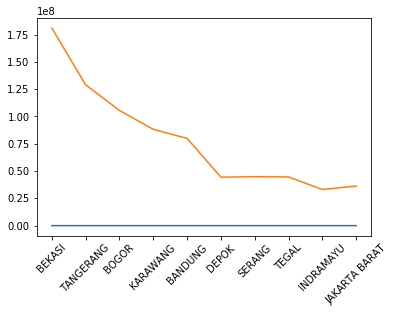

In [14]:
import matplotlib.pyplot as plt

plt.plot(top10_kota)
plt.xticks(rotation='45')
#plt.ylabel('Penjualan')
#plt.xlabel('Kabupaten')
plt.show()

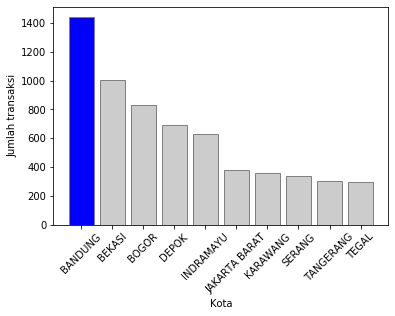

In [15]:
kotas = [kota for kota, df in top10_kota.groupby(['KOTA'])]

plt.bar(kotas, top10_kota['JML'], color = ['blue', '0.8', '0.8', '0.8', '0.8', '0.8', '0.8', '0.8', '0.8', '0.8'], edgecolor='grey')
plt.xticks(kotas, rotation = '45', size = 10)
plt.ylabel('Jumlah transaksi')
plt.xlabel('Kota')
plt.show()

[Text(0, 0, 'BEKASI'),
 Text(0, 0, 'TANGERANG'),
 Text(0, 0, 'BOGOR'),
 Text(0, 0, 'KARAWANG'),
 Text(0, 0, 'BANDUNG'),
 Text(0, 0, 'DEPOK'),
 Text(0, 0, 'SERANG'),
 Text(0, 0, 'TEGAL'),
 Text(0, 0, 'INDRAMAYU'),
 Text(0, 0, 'JAKARTA BARAT')]

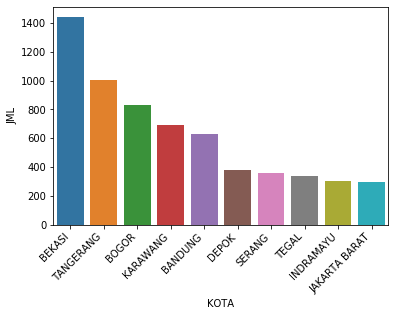

In [77]:
kota_chart = sns.barplot(x=top10_kota.index,y='JML', data=top10_kota)
#top10_kota.info()
kota_chart.set_xticklabels(kota_chart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [17]:
# Mengetahui pembeli setia
# Nama pembeli dalam uppercase

all_data['NAMA'] = all_data['NAMA'].str.upper()
all_data.head()

,#REF!,ALAMAT,BANK,CS,DISKON,EKSPEDISI,JML,KET,NAMA,NAMA/KODE CS,NO HP,NOMINAL,ONGKIR,ORDERAN,TGL ORDER,TGL TRF,Unnamed: 16,VALIDASI,no,KOTA
0,NaN,JL. TEMPUREJO GANG V/7 RT/RW: 002/003 KEC : MU...,BCA,CS YENI (082321458214),NaN,JNE REG,1.0,NaN,ULICK,NaN,085737824872,208003,19000,Fazilla Purple Kids size.5 (set),30/03/19,201904.0,NaN,WAWAT,(01)1,SURABAYA
1,NaN,JL.PEMDA RT.9 MALINAU HULU KECAMATAN :MALINAU ...,BCA,CS YENI (082321458214),25000,JNE REG,6.0,NaN,RATNA PRATININGRUM,NaN,082254494711,1725003,146000,- ELENORA CREAM L(5) do\n- Elenora kids cream ...,30/03/19,201904.0,NaN,WAWAT,(01)2,MALINAU
2,NaN,DSN. CIAGEM RT 13/03 DSA. JAYAMAKMUR KECAMATAN...,BCA,CS YENI (082321458214),NaN,JNE REG,2.0,NaN,NURLAELAH,NaN,085811795122,354003,16000,- Keya Taro XL do\n- Khimar Tisha Lavender,30/03/19,201904.0,NaN,WAWAT,(01)3,KARAWANG
3,NaN,JALAN SEGARA MADU/PASAR IKAN KEDONGANAN DEPAN ...,BRI,CS YENI (082321458214),NaN,JNE REG,2.0,NaN,A JUNAIDI,NaN,083119548203,464003,24000,- Alesha peach M do\n- Khimar elenora peach (p...,30/03/19,201904.0,NaN,WAWAT,(01)4,BADUNG
4,NaN,PERUM CKM BLOK D13 NO 18(WARNA UNGU) RT 25 RW ...,BCA,CS YENI (082321458214),NaN,JNE REG,1.0,NaN,ARIYANTO SAPUTRO,NaN,081317578751,207003,12000,Tisha Putih M do,31/03/19,201904.0,NaN,WAWAT,(01)5,KARAWANG


In [18]:
groupby_nama = all_data.groupby(['NAMA']).sum().nlargest(20,'JML')
top10_nama = groupby_nama.drop(columns=['#REF!'])
top10_nama.head(20)

,JML,TGL TRF
NAMA,,
INDAH YULIANI RAHIM,39.0,201912.0
LIA,38.0,3432729.0
CUNSIN LUTFIA,36.0,403816.0
TOKO ALYA,36.0,1615259.0
SRI WAHYUNI,26.0,2423092.0
YANI,26.0,3230715.0
ANITA,24.0,2827269.0
FITRI,24.0,3432899.0
YULIANA,24.0,2221173.0


[Text(0, 0, 'INDAH YULIANI RAHIM'),
 Text(0, 0, 'LIA'),
 Text(0, 0, 'CUNSIN LUTFIA'),
 Text(0, 0, 'TOKO ALYA'),
 Text(0, 0, 'SRI WAHYUNI'),
 Text(0, 0, 'YANI'),
 Text(0, 0, 'ANITA'),
 Text(0, 0, 'FITRI'),
 Text(0, 0, 'YULIANA'),
 Text(0, 0, 'RIKA RAHMAWATY'),
 Text(0, 0, 'SULASTRI'),
 Text(0, 0, 'SIANE CENDANI'),
 Text(0, 0, 'AGUSTINA DWI YULIANA'),
 Text(0, 0, 'AIRA'),
 Text(0, 0, 'ELIYA NORA'),
 Text(0, 0, 'YUNITA'),
 Text(0, 0, 'NURHAYATI'),
 Text(0, 0, 'TRI SULISTYANINGSIH'),
 Text(0, 0, 'WINDA'),
 Text(0, 0, 'FITRIYANI')]

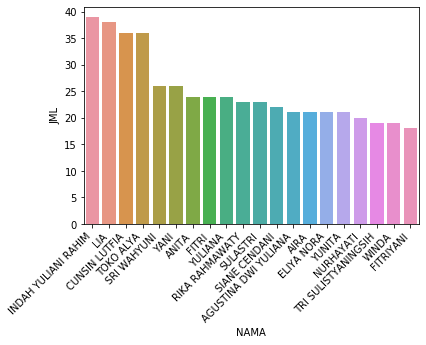

In [19]:
nama_chart = sns.barplot(x=top10_nama.index,y='JML', data=top10_nama)
#top10_kota.info()
nama_chart.set_xticklabels(nama_chart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [20]:
indah = all_data[all_data['NAMA'] == 'INDAH YULIANI RAHIM']
indah

,#REF!,ALAMAT,BANK,CS,DISKON,EKSPEDISI,JML,KET,NAMA,NAMA/KODE CS,NO HP,NOMINAL,ONGKIR,ORDERAN,TGL ORDER,TGL TRF,Unnamed: 16,VALIDASI,no,KOTA
8607,NaN,PERUMAHAN DOSEN UNHAS BG 76 JL PERINTIS KEMERD...,mandiri,CS NENTI (089663515811),NaN,jne oke,39.0,NaN,INDAH YULIANI RAHIM,NaN,85341110084,5160000,440000,- khimar elenora (4 warna)\n- pasmina hulya (4...,2019-12-19 00:00:00,201912.0,NaN,NaN,(12)69,MAKASSAR


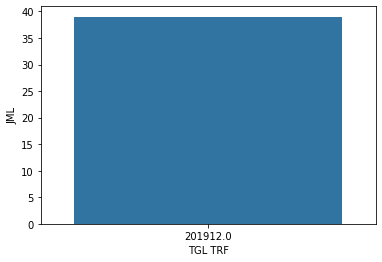

In [82]:
sns.barplot(x='TGL TRF', y='JML',data=indah)

In [79]:
lia = all_data[all_data['NAMA'] == 'LIA']

[Text(0, 0, '201905.0'),
 Text(0, 0, '201906.0'),
 Text(0, 0, '201907.0'),
 Text(0, 0, '201908.0'),
 Text(0, 0, '201910.0'),
 Text(0, 0, '201911.0'),
 Text(0, 0, '201912.0'),
 Text(0, 0, '202001.0')]

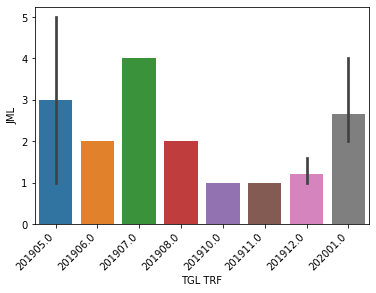

In [88]:
lia_chart = sns.barplot(x='TGL TRF', y='JML',data=lia)
lia_chart.set_xticklabels(lia_chart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [22]:
all_data[all_data['NAMA'] == 'CUNSIN LUTFIA']

,#REF!,ALAMAT,BANK,CS,DISKON,EKSPEDISI,JML,KET,NAMA,NAMA/KODE CS,NO HP,NOMINAL,ONGKIR,ORDERAN,TGL ORDER,TGL TRF,Unnamed: 16,VALIDASI,no,KOTA
60,NaN,DESA MUNCANGELA BLOK PUHUN RT 04/02 KECAMATAN ...,BRI,CS YENI (082321458214),NaN,JNE REG,18.0,NaN,CUNSIN LUTFIA,NaN,083824433474,2655003,144000,"Tisha Lavender S(3), M(2), L(2), XL(2) SET",2019-09-04 00:00:00,201904.0,NaN,WAWAT,(09)4,KUNINGAN
7629,NaN,DESA MUNCANGELA BLOK PUHUN RT 04/02 KECAMATAN ...,BRI,CS YENI (082321458214),NaN,JNE REG,18.0,NaN,CUNSIN LUTFIA,NaN,83824433474,2655003,144000,"Tisha Lavender S(3), M(2), L(2), XL(2) SET",2019-04-09 00:00:00,201912.0,NaN,NaN,(09)4,KUNINGAN


In [23]:
pd.set_option('display.max_colwidth', 30)
all_data[all_data['NAMA'] == 'TOKO ALYA']['ORDERAN']

3219    Dress Tisha Navy XL set 1 ...
3220    Dress Carys Kids Peanut Um...
3242    Dress Fayra salmon L set, ...
3516    Dress Tisha Navy XL set 1 ...
3517    Dress Carys Kids Peanut Um...
3539    Dress Fayra salmon L set, ...
4783    Dress Neisha Orange juice ...
5329    Dress Neisha Orange juice ...
Name: ORDERAN, dtype: object

In [24]:
# Perbandingan umur dengan melihat warna pesanan

# Kolom orderan dalam uppercase
all_data['ORDERAN'] = all_data['ORDERAN'].str.upper()
all_data.head()

,#REF!,ALAMAT,BANK,CS,DISKON,EKSPEDISI,JML,KET,NAMA,NAMA/KODE CS,NO HP,NOMINAL,ONGKIR,ORDERAN,TGL ORDER,TGL TRF,Unnamed: 16,VALIDASI,no,KOTA
0,NaN,JL. TEMPUREJO GANG V/7 RT/...,BCA,CS YENI (082321458214),NaN,JNE REG,1.0,NaN,ULICK,NaN,085737824872,208003,19000,FAZILLA PURPLE KIDS SIZE.5...,30/03/19,201904.0,NaN,WAWAT,(01)1,SURABAYA
1,NaN,JL.PEMDA RT.9 MALINAU HULU...,BCA,CS YENI (082321458214),25000,JNE REG,6.0,NaN,RATNA PRATININGRUM,NaN,082254494711,1725003,146000,- ELENORA CREAM L(5) DO\n-...,30/03/19,201904.0,NaN,WAWAT,(01)2,MALINAU
2,NaN,DSN. CIAGEM RT 13/03 DSA. ...,BCA,CS YENI (082321458214),NaN,JNE REG,2.0,NaN,NURLAELAH,NaN,085811795122,354003,16000,- KEYA TARO XL DO\n- KHIMA...,30/03/19,201904.0,NaN,WAWAT,(01)3,KARAWANG
3,NaN,JALAN SEGARA MADU/PASAR IK...,BRI,CS YENI (082321458214),NaN,JNE REG,2.0,NaN,A JUNAIDI,NaN,083119548203,464003,24000,- ALESHA PEACH M DO\n- KHI...,30/03/19,201904.0,NaN,WAWAT,(01)4,BADUNG
4,NaN,PERUM CKM BLOK D13 NO 18(W...,BCA,CS YENI (082321458214),NaN,JNE REG,1.0,NaN,ARIYANTO SAPUTRO,NaN,081317578751,207003,12000,TISHA PUTIH M DO,31/03/19,201904.0,NaN,WAWAT,(01)5,KARAWANG


In [25]:
list_warna = ['HITAM', 'BLACK', 'NAVY', 'LAVENDER', 'BABYPINK', 'CHOCO', 'PEACH', 'MAGENTA', 'ROSE', 'MAUVE', 'PUTIH', 'WHITE', 'PINK', 'TOSCA', 'FLAMINGO', 'NUDE', 'PURPLE', 'CREAM', 'BEIGE', 'GOLD', 'BLUE', 'BIRU', 'PLUM', 'CORAL', 'BERRY', 'BLOOD', 'ORANGE', 'DARKBROWN', 'CHARWOOD', 'PEARL', 'GRAPE', 'GREEN', 'GREY', 'MAROON', 'ALMOND', 'BLUSH', 'DUSTYPINK', 'BROWN', 'MATCHA', 'BLUSH', 'NOUGAT', 'SALMON', 'BUBBLE GUM', 'BUBBLEGUM', 'MOCA', 'SAPHIRE', 'DENIM', 'LILAC', 'YELLOW', 'PUNCH', 'BABYBLUE', 'BERRY', 'AQUA']

In [26]:
# regex untuk mendeteksi nama kota dalam kolom alamat

war = '({})'.format('|'.join([r'\b{}\b'.format(x) for x in list_warna]))

all_data_warna = all_data['ORDERAN'].str.extract(war)
#all_data_kota[0].apply(type).value_counts()

all_data_warna

,0
0,PURPLE
1,CREAM
2,LAVENDER
3,PEACH
4,PUTIH
...,...
12151,MAGENTA
12152,MAGENTA
12154,BLACK
12155,BLACK


In [27]:
all_data['WARNA'] = all_data_warna[0]
all_data.head()

,#REF!,ALAMAT,BANK,CS,DISKON,EKSPEDISI,JML,KET,NAMA,NAMA/KODE CS,...,NOMINAL,ONGKIR,ORDERAN,TGL ORDER,TGL TRF,Unnamed: 16,VALIDASI,no,KOTA,WARNA
0,NaN,JL. TEMPUREJO GANG V/7 RT/...,BCA,CS YENI (082321458214),NaN,JNE REG,1.0,NaN,ULICK,NaN,...,208003,19000,FAZILLA PURPLE KIDS SIZE.5...,30/03/19,201904.0,NaN,WAWAT,(01)1,SURABAYA,PURPLE
1,NaN,JL.PEMDA RT.9 MALINAU HULU...,BCA,CS YENI (082321458214),25000,JNE REG,6.0,NaN,RATNA PRATININGRUM,NaN,...,1725003,146000,- ELENORA CREAM L(5) DO\n-...,30/03/19,201904.0,NaN,WAWAT,(01)2,MALINAU,CREAM
2,NaN,DSN. CIAGEM RT 13/03 DSA. ...,BCA,CS YENI (082321458214),NaN,JNE REG,2.0,NaN,NURLAELAH,NaN,...,354003,16000,- KEYA TARO XL DO\n- KHIMA...,30/03/19,201904.0,NaN,WAWAT,(01)3,KARAWANG,LAVENDER
3,NaN,JALAN SEGARA MADU/PASAR IK...,BRI,CS YENI (082321458214),NaN,JNE REG,2.0,NaN,A JUNAIDI,NaN,...,464003,24000,- ALESHA PEACH M DO\n- KHI...,30/03/19,201904.0,NaN,WAWAT,(01)4,BADUNG,PEACH
4,NaN,PERUM CKM BLOK D13 NO 18(W...,BCA,CS YENI (082321458214),NaN,JNE REG,1.0,NaN,ARIYANTO SAPUTRO,NaN,...,207003,12000,TISHA PUTIH M DO,31/03/19,201904.0,NaN,WAWAT,(01)5,KARAWANG,PUTIH


In [28]:
all_data[all_data['WARNA'].isna()]

,#REF!,ALAMAT,BANK,CS,DISKON,EKSPEDISI,JML,KET,NAMA,NAMA/KODE CS,...,NOMINAL,ONGKIR,ORDERAN,TGL ORDER,TGL TRF,Unnamed: 16,VALIDASI,no,KOTA,WARNA
156,NaN,"JL. MUARA BARU, GG MARLINA...",BRI,CS YENI (082321458214),NaN,JNE REG,2.0,NaN,BAPAK WIDI SAFRULLOH,NaN,...,155003,11000,- INNER RAJUT PAKET 1\n- H...,24/04/19,201904.0,NaN,WAWAT,(24)7,JAKARTA UTARA,NaN
164,NaN,JL. KH AGUS SALIM LINK. LU...,BRI,CS YENI (082321458214),NaN,JNE REG,1.0,NaN,QONITA,NaN,...,93003,14000,INNER RAJUT PAKET 1 (WARNA...,24/04/19,201904.0,NaN,Rosty,(25)5,CILEGON,NaN
195,NaN,JL. SERSAN HAMID KOMPLEKS ...,BRI,CS YENI (082321458214),NaN,POS,2.0,NaN,ANDI HAMDAN,NaN,...,168003,38000,HANDSOCK WARNA BARU PAKET ...,29/04/19,201904.0,NaN,WAWAT,(29)10,NaN,NaN
251,NaN,JL BOLODEWO RT 4 RW 2 KLIT...,MANDIRI,Dea (085213414302),NaN,REG,1.0,NaN,AINE ARTALIA,NaN,...,298004,29000,SHAINA HOTAM M DO,2019-04-10 00:00:00,201904.0,NaN,NaN,(11)3,MADIUN,NaN
267,NaN,JLN JEMBATAN 3 RAYA NO 5D ...,BRI,Dea (085213414302),NaN,REG,1.0,NaN,SBC EXPRESS,NaN,...,270004,12000,YARA MARRON M DO,2019-04-09 00:00:00,201904.0,NaN,NaN,(13)1,JAKARTA UTARA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12081,NaN,KARANGSAMBUNG RT 003 RW 00...,MANDIRI,NENTI/12 (089663515811),NaN,JNE REG,1.0,NaN,RATNA BHENDOLL,Nenti/12,...,180321,27000,DIARA NACHO L DO (GB),NaN,202002.0,NaN,NaN,(27)29,BREBES,NaN
12084,NaN,JL. KYAI NURSIYAH RT.06 RW...,BCA,DEA/5 (087725992232),NaN,POS,1.0,Di tf dari luar negri,CHOLID FADILAH,Dea/5,...,238097,19000,AYKOZ NAUGAT KIDS SIZE 10,NaN,202002.0,NaN,NaN,(28)3,BREBES,NaN
12088,NaN,JL SUDIMORO NO 25 KEL MOJO...,MANDIRI,DEPI/6 (0895700980983),NaN,POS,2.0,NaN,INDAH PUTRI,depi/6,...,658000,20000,ALEA RAIN M DO2,NaN,202002.0,NaN,NaN,NaN,MALANG,NaN
12091,NaN,KP GALIAN YAYASAN AL HUSNA...,BCA,ASNIA/7 (085351961936),NaN,JNE REG,1.0,NaN,HJ HASINAH,Asnia/7,...,331007,12000,ALDYS PREAL XL DO,NaN,202002.0,NaN,NaN,(28)9,BEKASI,NaN


In [49]:
#all_data[all_data['WARNA'] == 'NAVY']['WARNA'].count()

warna = all_data.groupby('WARNA').sum().nlargest(20,'JML')
warna

,#REF!,JML,TGL TRF
WARNA,,,
NAVY,0.0,1632.0,192030149.0
CHOCO,0.0,1598.0,192835286.0
PINK,0.0,1308.0,154475927.0
HITAM,0.0,1231.0,148409939.0
MAGENTA,0.0,1039.0,132865636.0
LAVENDER,0.0,982.0,111055288.0
PEACH,0.0,950.0,108838264.0
SALMON,0.0,835.0,104391878.0
NUDE,0.0,675.0,80371233.0


[Text(0, 0, 'NAVY'),
 Text(0, 0, 'CHOCO'),
 Text(0, 0, 'PINK'),
 Text(0, 0, 'HITAM'),
 Text(0, 0, 'MAGENTA'),
 Text(0, 0, 'LAVENDER'),
 Text(0, 0, 'PEACH'),
 Text(0, 0, 'SALMON'),
 Text(0, 0, 'NUDE'),
 Text(0, 0, 'MAROON'),
 Text(0, 0, 'PLUM'),
 Text(0, 0, 'GREY'),
 Text(0, 0, 'LILAC'),
 Text(0, 0, 'GREEN'),
 Text(0, 0, 'BLUE'),
 Text(0, 0, 'BLACK'),
 Text(0, 0, 'CREAM'),
 Text(0, 0, 'ORANGE'),
 Text(0, 0, 'DENIM'),
 Text(0, 0, 'PUTIH')]

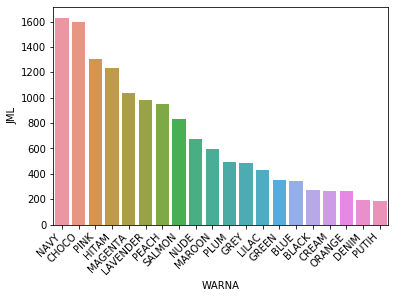

In [50]:
warna_chart = sns.barplot(x=warna.index, y='JML', data=warna)
warna_chart.set_xticklabels(warna_chart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [30]:
# Perbandingan jumlah set & dress only

set_do = ['SET', 'DO']

# regex untuk mendeteksi set/do dalam kolom 'ORDERAN'

sd = '({})'.format('|'.join([r'\b{}\b'.format(x) for x in set_do]))

all_data_set_do = all_data['ORDERAN'].str.extract(sd)

all_data_set_do

,0
0,SET
1,DO
2,DO
3,DO
4,DO
...,...
12151,DO
12152,DO
12154,DO
12155,NaN


In [31]:
all_data['SET_DO'] = all_data_set_do[0]
all_data.head()

,#REF!,ALAMAT,BANK,CS,DISKON,EKSPEDISI,JML,KET,NAMA,NAMA/KODE CS,...,ONGKIR,ORDERAN,TGL ORDER,TGL TRF,Unnamed: 16,VALIDASI,no,KOTA,WARNA,SET_DO
0,NaN,JL. TEMPUREJO GANG V/7 RT/...,BCA,CS YENI (082321458214),NaN,JNE REG,1.0,NaN,ULICK,NaN,...,19000,FAZILLA PURPLE KIDS SIZE.5...,30/03/19,201904.0,NaN,WAWAT,(01)1,SURABAYA,PURPLE,SET
1,NaN,JL.PEMDA RT.9 MALINAU HULU...,BCA,CS YENI (082321458214),25000,JNE REG,6.0,NaN,RATNA PRATININGRUM,NaN,...,146000,- ELENORA CREAM L(5) DO\n-...,30/03/19,201904.0,NaN,WAWAT,(01)2,MALINAU,CREAM,DO
2,NaN,DSN. CIAGEM RT 13/03 DSA. ...,BCA,CS YENI (082321458214),NaN,JNE REG,2.0,NaN,NURLAELAH,NaN,...,16000,- KEYA TARO XL DO\n- KHIMA...,30/03/19,201904.0,NaN,WAWAT,(01)3,KARAWANG,LAVENDER,DO
3,NaN,JALAN SEGARA MADU/PASAR IK...,BRI,CS YENI (082321458214),NaN,JNE REG,2.0,NaN,A JUNAIDI,NaN,...,24000,- ALESHA PEACH M DO\n- KHI...,30/03/19,201904.0,NaN,WAWAT,(01)4,BADUNG,PEACH,DO
4,NaN,PERUM CKM BLOK D13 NO 18(W...,BCA,CS YENI (082321458214),NaN,JNE REG,1.0,NaN,ARIYANTO SAPUTRO,NaN,...,12000,TISHA PUTIH M DO,31/03/19,201904.0,NaN,WAWAT,(01)5,KARAWANG,PUTIH,DO


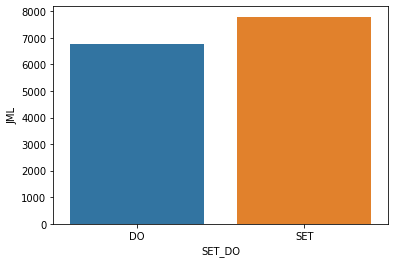

In [52]:
set_do_group = all_data.groupby('SET_DO').sum()

set_do_chart = sns.barplot(x=set_do_group.index, y='JML', data=set_do_group)

In [33]:
tr_per_bulan = all_data.groupby('TGL TRF').sum()
tr_per_bulan

,#REF!,JML
TGL TRF,,
201904.0,0.0,1981.0
201905.0,0.0,2065.0
201906.0,0.0,428.0
201907.0,0.0,1517.0
201908.0,0.0,2184.0
201909.0,0.0,905.0
201910.0,0.0,365.0
201911.0,0.0,2607.0
201912.0,0.0,3338.0


[Text(0, 0, 'Apr 2019'),
 Text(0, 0, 'Mei 2019'),
 Text(0, 0, 'Jun 2019'),
 Text(0, 0, 'Jul 2019'),
 Text(0, 0, 'Agu 2019'),
 Text(0, 0, 'Sep 2019'),
 Text(0, 0, 'Okt 2019'),
 Text(0, 0, 'Nov 2019'),
 Text(0, 0, 'Des 2019'),
 Text(0, 0, 'Jan 2020'),
 Text(0, 0, 'Feb 2020')]

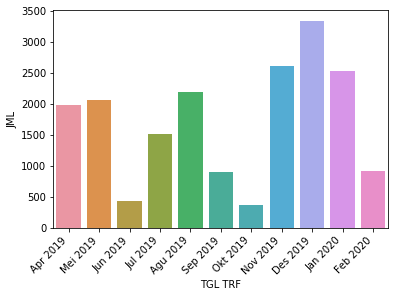

In [74]:
bulan_chart = sns.barplot(x=tr_per_bulan.index, y='JML', data=tr_per_bulan)
bulan_chart.set_xticklabels(['Apr 2019','Mei 2019','Jun 2019','Jul 2019','Agu 2019','Sep 2019','Okt 2019','Nov 2019','Des 2019','Jan 2020','Feb 2020'], rotation=45, horizontalalignment='right')
#bulan_chart = sns.lineplot(x=tr_per_bulan.index, y='JML', data=tr_per_bulan)
#bulan_chart.set_xticks(range(len(tr_per_bulan)))
#bulan_chart.set_xticklabels(bulan_chart.get_xticklabels(), rotation=45, horizontalalignment='right')
#range(len(tr_per_bulan))

In [35]:
l1 = [1, 2, 3, 'A']
#type(l1)
#all_data.groupby('TGL TRF')
sum(filter(lambda i: isinstance(i, int), l1))

6

In [36]:
all_data['NOMINAL'].apply(type).value_counts()

<class 'int'>      11107
<class 'str'>        191
<class 'float'>       13
Name: NOMINAL, dtype: int64

In [37]:
list_ukuran = [' S ', ' M ', ' L ']

In [38]:
# Try Regex

import re
s = "These are oranges and apples and pears, but not pinapples or .. and what or not and"
r = re.compile(r'\bAND\b | \bOR\b | \bNOT\b', flags=re.I | re.X)
list_regex = r.findall(s)
list_regex

['and', 'and', 'not', 'or', 'and', 'or', 'not', 'and']

In [39]:
#pat = '({})'.format('|'.join([r'\b{}\b'.format(x) for x in list_kota_u]))

# all_data['Kota'] = 


#all_data_kota = all_data['ALAMAT'].str.extract(pat)

In [40]:
all_data.loc[8607,'ORDERAN']

'- KHIMAR ELENORA (4 WARNA)\n- PASMINA HULYA (4 WARNA)\n- KHIMAR RAFAILA (5 WARNA)\n- KHIMAR SHAINA (4 WARNA)\n- AYKIZ KIDS NAVY 3-5, 7-10\n- AYKIZ KIDS MAGENTA 3-5, 7-10\n- AYKIZ KIDS PEACH 3-5, 7-10\n- AYKIZ KIDS CREAM 3-5, 7-10\n- AYKIZ KIDS NOUGAT 3-5, 7-10\n- FAYRA SALMON S DO (GRADE B)\n- FAYRA SALMON XL DO (GRADE B)'

In [41]:
all_data['ALAMAT'].str.extract(pat)

,0,1
0,SURABAYA,NaN
1,MALINAU,NaN
2,KARAWANG,NaN
3,BADUNG,NaN
4,KARAWANG,NaN
...,...,...
12151,CIREBON,NaN
12152,KARAWANG,NaN
12154,NaN,NaN
12155,JAKARTA TIMUR,NaN
